## Problem description

In [1]:
from rmgpy.species import Species
from rmgpy.data.rmg import RMGDatabase
from rmgpy import settings

In [2]:
database = RMGDatabase()
database.load(settings['database.directory'], thermoLibraries='none',\
             kineticsFamilies='none', kineticsDepositories='none', reactionLibraries = [])

thermoDatabase = database.thermo

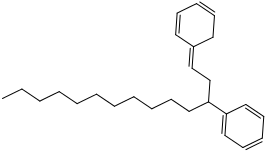

In [3]:
spec1 = Species().fromSMILES('CCCCCCCCCCCC(CC=C1C=CC=CC1)c1ccccc1')
spec1.generateResonanceIsomers()
spec1

In [4]:
spec1_thermo = thermoDatabase.estimateThermoViaGroupAdditivity(spec1.molecule[1])
spec1_thermo

ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([460.181,600.923,726.861,833.587,996.746,1113.58,1287.32],'J/(mol*K)'), H298=(-44.6851,'kJ/mol'), S298=(1076.57,'J/(mol*K)'), comment="""Thermo group additivity estimation: group(Cs-CbCsCsH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cs-(Cds-Cds)(Cds-Cds)HH) + other(R) + group(Cs-CsHHH) + other(R) + group(Cb-Cs) + other(R) + group(Cds-Cds(Cds-Cds)Cs) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cb-H) + other(R) + group(

we only need one ring correction (`ring(13cyclohexadiene5methylene)`), but RMG gives two. This is caused by the code block below:
```python
def computeGroupAdditivityThermo(self, molecule):
....
    rings = molecule.getSmallestSetOfSmallestRings()
    for ring in rings:
        # Make a temporary structure containing only the atoms in the ring
        # NB. if any of the ring corrections depend on ligands not in the ring, they will not be found!
        try:
            self.__addGroupThermoData(thermoData, self.groups['ring'], molecule, {})
        except KeyError:
            logging.error("Couldn't find in ring database:")
            logging.error(ring)
            logging.error(ring.toAdjacencyList())
            raise
```

## After the new commit

In [4]:
spec1_thermo = thermoDatabase.estimateThermoViaGroupAdditivity(spec1.molecule[1])
spec1_thermo

ThermoData(Tdata=([300,400,500,600,800,1000,1500],'K'), Cpdata=([482.93,626.395,751.078,854.482,1011.92,1124.73,1292.28],'J/(mol*K)'), H298=(-24.6856,'kJ/mol'), S298=(958.185,'J/(mol*K)'), comment="""Thermo group additivity estimation: group(Cs-CbCsCsH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-CsCsHH) + other(R) + group(Cs-(Cds-Cds)CsHH) + other(R) + group(Cs-(Cds-Cds)(Cds-Cds)HH) + other(R) + group(Cs-CsHHH) + other(R) + group(Cb-Cs) + other(R) + group(Cds-Cds(Cds-Cds)Cs) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-CdsCsH) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cb-H) + other(R) + group(Cb-H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cds-Cds(Cds-Cds)H) + other(R) + group(Cb-H) + other(R) + group(C